All the report are based on **last executaion**, it may vary due to random spliting. <br>
Results of the last execution are as follows

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt 
from sklearn.neural_network import MLPClassifier
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("ionosphere.csv", header = None)
target = 34

In [4]:
df.shape

(351, 35)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [6]:
X = df.drop(target, axis = 1)
y = df[target]

# Spilting data in Train and Test

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Support Vector Machine

### Linear SVM

In [8]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [9]:
y_pred = svclassifier.predict(X_test)

In [10]:
print(accuracy_score(y_pred, y_test))

0.8732394366197183


### Quadratic SVM

In [11]:
svclassifier_quad = SVC(kernel='poly', degree=2)
svclassifier_quad.fit(X_train, y_train)

SVC(degree=2, kernel='poly')

In [12]:
y_pred = svclassifier_quad.predict(X_test)

In [13]:
print(accuracy_score(y_pred, y_test))

0.9154929577464789


### Radial Basis Function SVM

In [14]:
svclassifier_rbf = SVC(kernel='rbf')
svclassifier_rbf.fit(X_train, y_train)

SVC()

In [15]:
y_pred = svclassifier_rbf.predict(X_test)

In [16]:
print(accuracy_score(y_pred, y_test))

0.9577464788732394


# SVM with Different Values of C

In [17]:
from random import randrange

C_list=[]
while len(C_list) < 15:
    x = randrange(100)
    if x == 0 or x in C_list:
        continue
    C_list.append(x)
    
C_list.sort() 
    
column_values = ['generalization constant C', 'accuracy'] 

In [18]:
def max_fun(comp_table):
    arr = []
    max_accuracy = max(comp_table[:,1])
    for i in range(len(comp_table)):
        if comp_table[i][1] == max_accuracy:
            arr.append(comp_table[i][0])
    return max_accuracy, arr
            

In [19]:
def plot_graph(plot_x, plot_y):

    
    plt.plot(plot_x,plot_y)
    plt.xlabel('generalization constant C')
    plt.ylabel('Achieved Accuracy')
    plt.title('Accuracy Vs generalization constant C')
    plt.show()

In [20]:
def plot_graph_(plot_x, plot_y):

    
    plt.plot(plot_x,plot_y)
    plt.xlabel('Learning Rate')
    plt.ylabel('Achieved Accuracy')
    plt.title('Accuracy Vs Learning Rate Vs ')
    plt.show()

### Linear SVM

In [21]:
comp_table = []
for val in C_list:
    
    svclassifier = SVC(kernel='linear', C=val)
    svclassifier.fit(X_train, y_train)
    
    y_pred = svclassifier.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    
    comp_table.append([val, accuracy])

comp_table = np.array(comp_table)
    

In [22]:
max_accuracy, C_max_list = max_fun(comp_table)

In [23]:
comp_table = pd.DataFrame(data = comp_table,  
                  columns = column_values)

In [24]:
comp_table

,generalization constant C,accuracy
0,9.0,0.887324
1,22.0,0.873239
2,36.0,0.873239
3,42.0,0.873239
4,50.0,0.859155
5,51.0,0.859155
6,53.0,0.859155
7,59.0,0.859155
8,64.0,0.859155
9,67.0,0.873239


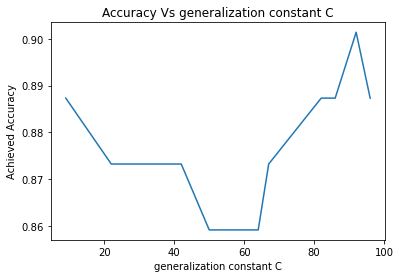

In [25]:
plot_graph(C_list,comp_table["accuracy"])

In [26]:
print("max_accuracy = " + str(max_accuracy) + "\nfor C values = " , C_max_list)

max_accuracy = 0.9014084507042254
for C values =  [92.0]


### Quadratic SVM

In [27]:
comp_table = []
for val in C_list:
    
    svclassifier = SVC(kernel='poly', degree=2, C=val)
    svclassifier.fit(X_train, y_train)
    
    y_pred = svclassifier.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    
    comp_table.append([val, accuracy])
    

In [28]:
comp_table = np.array(comp_table)
max_accuracy, C_max_list = max_fun(comp_table)
comp_table = pd.DataFrame(data = comp_table,  
                  columns = column_values)

In [29]:
comp_table

,generalization constant C,accuracy
0,9.0,0.943662
1,22.0,0.929577
2,36.0,0.929577
3,42.0,0.915493
4,50.0,0.901408
5,51.0,0.901408
6,53.0,0.901408
7,59.0,0.901408
8,64.0,0.901408
9,67.0,0.915493


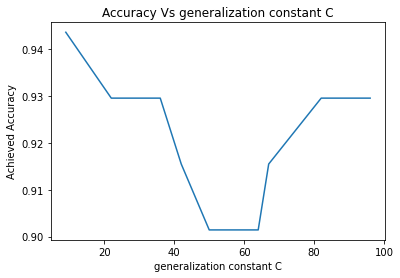

In [30]:
plot_graph(C_list,comp_table["accuracy"])

In [31]:
print("max_accuracy = " + str(max_accuracy) + "\nfor C values = " , C_max_list)

max_accuracy = 0.9436619718309859
for C values =  [9.0]


### Radial Basis Function SVM


In [32]:
comp_table = []
for val in C_list:
    
    svclassifier = SVC(kernel='rbf', C=val)
    svclassifier.fit(X_train, y_train)
    
    y_pred = svclassifier.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    
    comp_table.append([val, accuracy])

In [33]:
comp_table = np.array(comp_table)
max_accuracy, C_max_list = max_fun(comp_table)
comp_table = pd.DataFrame(data = comp_table,  
                  columns = column_values)

In [34]:
comp_table

,generalization constant C,accuracy
0,9.0,0.971831
1,22.0,0.971831
2,36.0,0.971831
3,42.0,0.971831
4,50.0,0.971831
5,51.0,0.971831
6,53.0,0.971831
7,59.0,0.971831
8,64.0,0.971831
9,67.0,0.971831


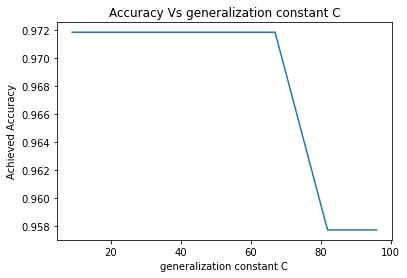

In [35]:
plot_graph(C_list,comp_table["accuracy"])

In [36]:
print("max_accuracy = " + str(max_accuracy) + "\nfor C values = " , C_max_list)

max_accuracy = 0.971830985915493
for C values =  [9.0, 22.0, 36.0, 42.0, 50.0, 51.0, 53.0, 59.0, 64.0, 67.0]


# MLP Classifier 

In [37]:
def avg(arr):
    return sum(arr)/len(arr)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

#### 0 hidden layer

In [39]:
nn=MLPClassifier(activation='logistic',solver='sgd',hidden_layer_sizes=(),random_state=1)


In [40]:
nn.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(), random_state=1,
              solver='sgd')

In [41]:
y_pred=nn.predict(X_test)

In [42]:
print(accuracy_score(y_test, y_pred))

0.7183098591549296


#### 1 hidden layer with 2 nodes

In [43]:
nn=MLPClassifier(activation='logistic',solver='sgd',hidden_layer_sizes=(2),random_state=1)

In [44]:
nn.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=2, random_state=1,
              solver='sgd')

In [45]:
y_pred=nn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.647887323943662


#### 1 hidden layer with 6 nodes

In [46]:
nn=MLPClassifier(activation='logistic',solver='sgd',hidden_layer_sizes=(6),random_state=1)

In [47]:
nn.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=6, random_state=1,
              solver='sgd')

In [48]:
y_pred=nn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.647887323943662


#### 2 hidden layers with 2 and 3 nodes respectively

In [49]:
nn=MLPClassifier(activation='logistic',solver='sgd',hidden_layer_sizes=(2,3),random_state=1)

In [50]:
nn.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2, 3), random_state=1,
              solver='sgd')

In [51]:
y_pred=nn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.647887323943662


#### 2 hidden layers with 3 and 2 nodes respectively

In [52]:
nn=MLPClassifier(activation='logistic',solver='sgd',hidden_layer_sizes=(3,2),random_state=1)

In [53]:
nn.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(3, 2), random_state=1,
              solver='sgd')

In [54]:
y_pred=nn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.647887323943662


# Varying learning rate

In [55]:
learning_rate = [ 0.1,0.01, 0.001, 0.0001,0.00001]


#### 0 hidden layer

In [56]:
mx_acc = (0,-1)
accuracy = []
for n in learning_rate:
    nn=MLPClassifier(activation='logistic',solver='sgd',hidden_layer_sizes=(),learning_rate_init=n,random_state=0)
    nn.fit(X_train, y_train)
    y_pred=nn.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    if accuracy_score(y_test, y_pred) >= mx_acc[0]:
        mx_acc = (accuracy_score(y_test, y_pred), n)


max accuracy :0.647887323943662, learning rate: 0.001
average: 0.5295774647887324


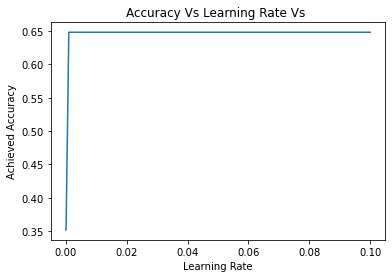

In [62]:
print("max accuracy :"+str(mx_acc[0])+", learning rate: "+str(mx_acc[1]))
print("average: "+ str(avg(accuracy)))
plot_graph_(learning_rate, accuracy)

m0 = mx_acc

#### 1 hidden layer with 6 nodes

max accuracy :0.8591549295774648, learning rate: 0.1
average: 0.6


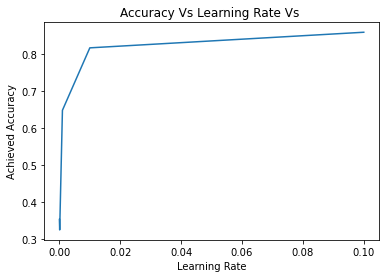

In [63]:
accuracy = []
mx_acc = (0,-1)

for n in learning_rate:
    nn=MLPClassifier(activation='logistic',solver='sgd',hidden_layer_sizes=(6),learning_rate_init=n,random_state=0)
    nn.fit(X_train, y_train)
    y_pred=nn.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    if accuracy_score(y_test, y_pred) >= mx_acc[0]:
        mx_acc = (accuracy_score(y_test, y_pred), n)
        
print("max accuracy :"+str(mx_acc[0])+", learning rate: "+str(mx_acc[1]))  
print("average: "+ str(avg(accuracy)))
plot_graph_(learning_rate, accuracy)

m1_6 = mx_acc

#### 1 hidden layers with 2 nodes respectively

max accuracy :0.8732394366197183, learning rate: 0.1
average: 0.695774647887324


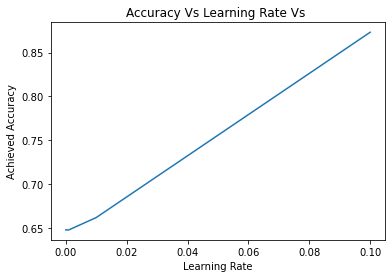

In [64]:
accuracy = []
mx_acc = (0,-1)

for n in learning_rate:
    nn=MLPClassifier(activation='logistic',solver='sgd',hidden_layer_sizes=(2),learning_rate_init=n,random_state=0)
    nn.fit(X_train, y_train)
    y_pred=nn.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    if accuracy_score(y_test, y_pred) >= mx_acc[0]:
        mx_acc = (accuracy_score(y_test, y_pred), n)
    
print("max accuracy :"+str(mx_acc[0])+", learning rate: "+str(mx_acc[1]))
print("average: "+ str(avg(accuracy)))
plot_graph_(learning_rate, accuracy)

m1_2 = mx_acc

#### 2 hidden layers with 2 and 3 nodes respectively

max accuracy :0.647887323943662, learning rate: 0.001
average: 0.5295774647887324


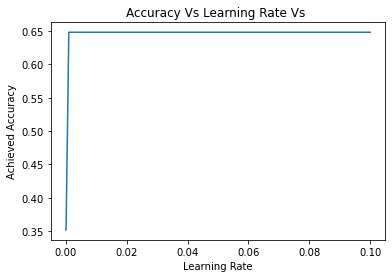

In [65]:
accuracy = []
mx_acc = (0,-1)

for n in learning_rate:
    nn=MLPClassifier(activation='logistic',solver='sgd',hidden_layer_sizes=(2,3),learning_rate_init=n,random_state=0)
    nn.fit(X_train, y_train)
    y_pred=nn.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    if accuracy_score(y_test, y_pred) >= mx_acc[0]:
        mx_acc = (accuracy_score(y_test, y_pred), n)
    
print("max accuracy :"+str(mx_acc[0])+", learning rate: "+str(mx_acc[1]))
print("average: "+ str(avg(accuracy)))
plot_graph_(learning_rate, accuracy)

m2_2_3 = mx_acc

#### 2 hidden layers with 3 and 2 nodes respectively

max accuracy :0.647887323943662, learning rate: 0.001
average: 0.5295774647887324


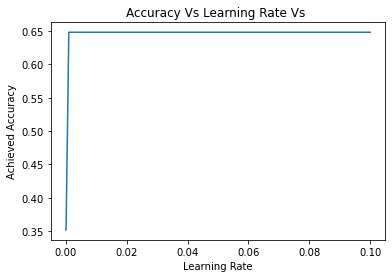

In [66]:
accuracy = []
mx_acc = (0,-1)

for n in learning_rate:
    nn=MLPClassifier(activation='logistic',solver='sgd',hidden_layer_sizes=(3,2),learning_rate_init=n,random_state=0)
    nn.fit(X_train, y_train)
    y_pred=nn.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    if accuracy_score(y_test, y_pred) >= mx_acc[0]:
        mx_acc = (accuracy_score(y_test, y_pred), n)
    
print("max accuracy :"+str(mx_acc[0])+", learning rate: "+str(mx_acc[1]))
print("average: "+ str(avg(accuracy)))
plot_graph_(learning_rate, accuracy)

m2_3_2 = mx_acc

 ### The Model with best Performance
 
 **The result may vary every time becuase of random spliting and different batch size of sdg**
 
 MLP artitechture  = 1 Hidden Layer with 2 Nodes <br> 
 Learning Rate     = 0.1 <br>
 maximum iteration = 200 <br>
 optimizer         = stochastic gradient descent <br>
 batch size        = min(200, n_samples) <br>
 activation        = logistics [ f(x) = 1 / (1 + exp(-x))]<br>
 
 Accuracy          = 0.8732394366197183